# 🧠 감성 분석 모델 고도화 실습 (TF-IDF + Logistic Regression)

In [ ]:

# 설치가 안 되어 있다면 아래 명령을 먼저 실행하세요
# !pip install pandas scikit-learn


In [4]:

import pandas as pd

# 감성 분석 결과 CSV 로드 (파일명은 수정 가능)
df = pd.read_csv("36000_reviews_label.csv")

# 필요 컬럼만 추출
df = df[['sentence', 'label']].dropna()
df = df[df['label'].isin(['긍정', '부정', '중립'])]
df.head()



,sentence,label
0,따뜻하고 좋아요 특히 사장님이 너무 친절해요,긍정
1,시설 좋은 곳 사용하려면 무조건 여기로 오는 것 같아요 무한 대실도 다음에 이용 예...,긍정
2,아주 만족합니다 시설 인테리어 아주 좋아요,긍정
3,진짜로 좋아요 아주 자주 이용하고 어 오,긍정
4,숙소가 깔끔하고 사장님도 친절하고 좋았어요 잘 쉬다 갑니다,긍정


In [5]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['sentence'], df['label'], test_size=0.2, random_state=42
)


In [6]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=5)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 추출된 단어 수 확인
print("실제 벡터 수:", len(vectorizer.get_feature_names_out()))


실제 벡터 수: 5000


In [7]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)


In [8]:

from sklearn.metrics import classification_report, accuracy_score

print("정확도:", accuracy_score(y_test, y_pred))
print("\n분류 리포트:")
print(classification_report(y_test, y_pred, digits=3))


정확도: 0.8733695652173913

분류 리포트:
              precision    recall  f1-score   support

          긍정      0.921     0.975     0.947      5604
          부정      0.775     0.579     0.663       649
          중립      0.624     0.532     0.574      1107

    accuracy                          0.873      7360
   macro avg      0.773     0.695     0.728      7360
weighted avg      0.864     0.873     0.866      7360



In [9]:

# 중요 단어 보기 (옵션)
features = vectorizer.get_feature_names_out()
import numpy as np

mean_tfidf = X_train_vec.mean(axis=0).A1
word_score_pairs = list(zip(features, mean_tfidf))
top_words = sorted(word_score_pairs, key=lambda x: x[1], reverse=True)[:30]

for word, score in top_words:
    print(f"{word}: {score:.4f}")


좋아요: 0.0430
너무: 0.0295
깨끗하고: 0.0252
갑니다: 0.0238
깔끔하고: 0.0217
좋았어요: 0.0187
좋았습니다: 0.0174
좋습니다: 0.0170
쉬다: 0.0162
있어서: 0.0138
쉬다 갑니다: 0.0133
항상: 0.0130
정말: 0.0128
좋고: 0.0126
친절하시고: 0.0117
좋은: 0.0114
전주: 0.0113
자주: 0.0112
같아요: 0.0100
가성비: 0.0099
아주: 0.0095
시설도: 0.0091
편하게: 0.0090
시설: 0.0090
좋네요: 0.0090
다음에: 0.0083
넓고: 0.0082
방도: 0.0079
있고: 0.0079
가격: 0.0078


In [15]:
from matplotlib import font_manager
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'nanum' in font.lower():
        print(font)

C:\Windows\Fonts\NanumPen.ttf
C:\Windows\Fonts\NanumGothicEcoBold.ttf
C:\Windows\Fonts\NanumSquareNeo-cBd.ttf
C:\Windows\Fonts\NanumMyeongjoBold.ttf
C:\Windows\Fonts\NanumGothicEco.ttf
C:\Windows\Fonts\NanumSquareNeo-eHv.ttf
C:\Windows\Fonts\NanumMyeongjoExtraBold.ttf
C:\Windows\Fonts\NanumSquareNeo-aLt.ttf
C:\Windows\Fonts\NanumGothicLight.ttf
C:\Windows\Fonts\NanumGothicExtraBold.ttf
C:\Windows\Fonts\NanumGothicEcoExtraBold.ttf
C:\Windows\Fonts\NanumSquareNeo-Variable.ttf
C:\Windows\Fonts\NanumGothicBold.ttf
C:\Windows\Fonts\NanumMyeongjo.ttf
C:\Windows\Fonts\NanumSquareNeo-dEb.ttf
C:\Windows\Fonts\NanumSquareNeo-bRg.ttf
C:\Windows\Fonts\NanumGothic.ttf
C:\Windows\Fonts\NanumMyeongjo-YetHangul.ttf


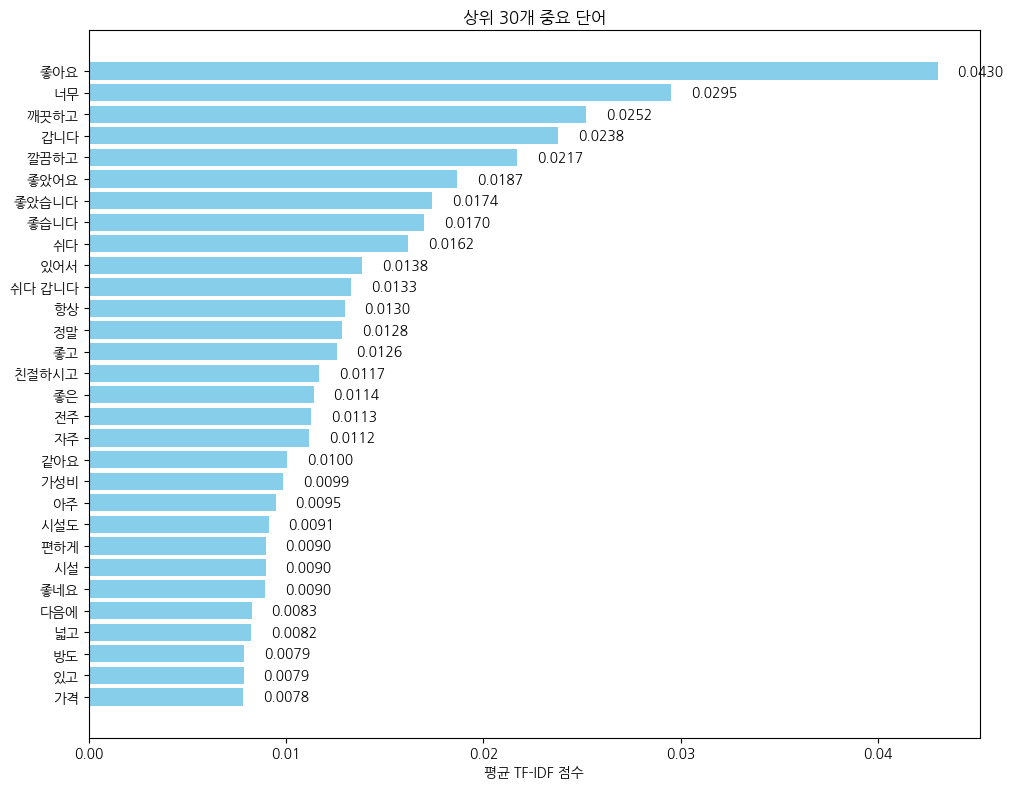

In [16]:
from matplotlib import font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

# 나눔고딕 폰트 경로
font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()

# 전역 설정에 폰트 반영
mpl.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 시각화
words, scores = zip(*top_words)
plt.figure(figsize=(10, 8))
bars = plt.barh(words, scores, color='skyblue')

plt.xlabel("평균 TF-IDF 점수")
plt.title("상위 30개 중요 단어")
plt.gca().invert_yaxis()
plt.tight_layout()

for bar, score in zip(bars, scores):
    plt.text(score + 0.001, bar.get_y() + bar.get_height()/2,
             f"{score:.4f}", va='center')

plt.show()

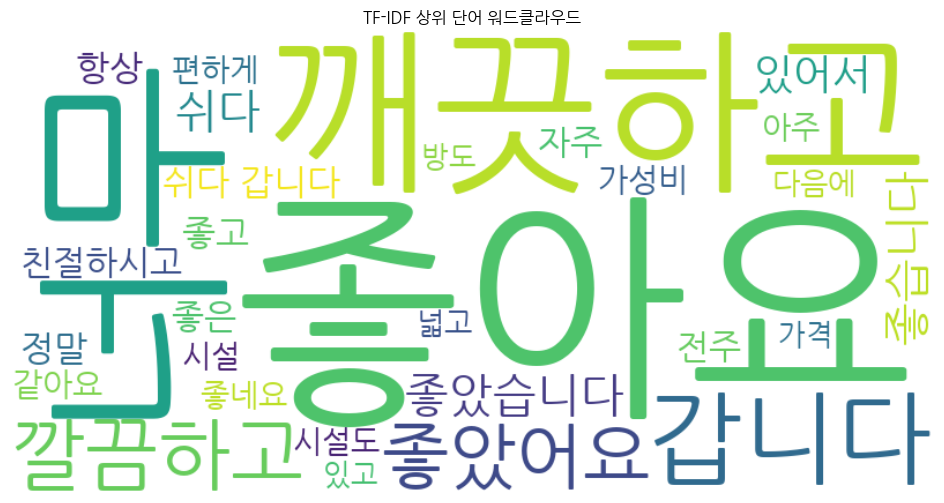

In [17]:
from wordcloud import WordCloud

# 워드클라우드는 딕셔너리 형태로 받아야 함
word_dict = dict(top_words)

wc = WordCloud(font_path="NanumGothic.ttf", background_color='white', width=800, height=400)
wc.generate_from_frequencies(word_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("TF-IDF 상위 단어 워드클라우드")
plt.show()